### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

In [ ]:
### Begin Assignment Here

## Table of Contents
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
 - 5.5 Dimensionality Reduction
 - 5.6 Discretization and Binarization
6. Data Exploration
7. Data Classification
8. Conclusion

##1. Data Source

Nostalgic Sentiment Analysis of YouTube Comments Data
https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data

##2. Data Preparation

In [ ]:
!pip install datasets
from datasets import load_dataset

In [9]:
# download the nostalgic sentiment analysis dataset
nostalgic_dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
nostalgic_dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/978 [00:00<?, ?B/s]

(…)nt_Analysis_of_YouTube_Comments_Data.csv:   0%|          | 0.00/219k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentiment', 'comment'],
        num_rows: 1500
    })
})

##3. Data Transformation

In [27]:
# convert the nostalgic_dataset to pd.dataframe
import pandas as pd

X = pd.DataFrame(nostalgic_dataset['train'])

print(f'X lenght:{len(X)}')
X.head(2)

X lenght:1500


,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...


In [28]:
# format the X with rename and adding columns
X = X.rename(columns={'sentiment': 'category_name'})
X = X.rename(columns={'comment': 'text'})
X['category'] = X['category_name'].apply(lambda x: 1 if x == 'nostalgia' else 0)

print(f'X lenght:{len(X)}')
X.head(2)

X lenght:1500


,category_name,text,category
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1


##4. Data Mining using Pandas

### 4.1 Dealing with Missing Values

In [29]:
# Remove rows with missing values
X.dropna(inplace=True)

print(f'X lenght:{len(X)}')
X.isnull().sum()

X lenght:1500


,0
category_name,0
text,0
category,0


### 4.2 Dealing with Duplicate Data

In [31]:
# Remove duplicate rows based on all columns
X.drop_duplicates(inplace=True)

print(f'X lenght:{len(X)}')
print(f'duplicate rows:{X.duplicated().sum()}')

X lenght:1499
duplicate rows:0


##5. Data Preprocessing

###5.1 Sampling

In [42]:
# random sample 40%
X_sample = X.sample(n=len(X)*40//100, random_state=42)

print(f'X lenght:{len(X)}')
print(f'X_sample lenght:{len(X_sample)}')

X lenght:1499
X_sample lenght:599


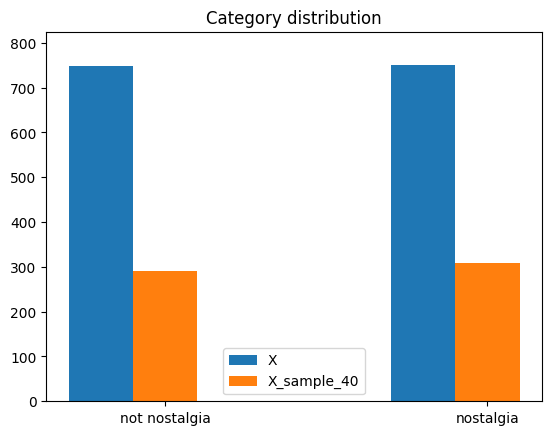

In [45]:
# plot the distribution of the categories in
# the original dataset and the sampled dataset
import matplotlib.pyplot as plt
import numpy as np

categories = set(X['category_name'])
X_distribution = X.category_name.value_counts().reindex(categories)
X_sample_distribution = X_sample.category_name.value_counts().reindex(categories)

X_axis = np.arange(len(X_distribution))

plt.bar(X_axis - 0.1, X_distribution, 0.2, label = 'X')
plt.bar(X_axis + 0.1, X_sample_distribution, 0.2, label = 'X_sample_40')

plt.ylim(0, max(pd.concat([X_distribution, X_sample_distribution]))*1.1)
plt.title('Category distribution')
plt.xticks(X_axis+0.1, X_distribution.index)
plt.legend()
plt.show()

###5.2 Feature Creation

In [50]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [67]:
# use nltk tokenizer to tokenize the text column
X['unigrams'] = X['text'].apply(lambda x: nltk.word_tokenize(x))
X['unigrams'][:2]

,unigrams
0,"[He, was, a, singer, with, a, golden, voice, t..."
1,"[The, mist, beautiful, voice, ever, I, listene..."


###5.3 Feature Subset Selection

In [74]:
# generate a document-term matrix from X text
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [77]:
print(count_vect.get_feature_names_out()[2688])
print(X_counts.shape)
print(count_vect.get_feature_names_out()[0:10])

relaxed
(1499, 3730)
['00' '000' '045' '07' '10' '100' '10m' '11' '11th' '12']


<Axes: >

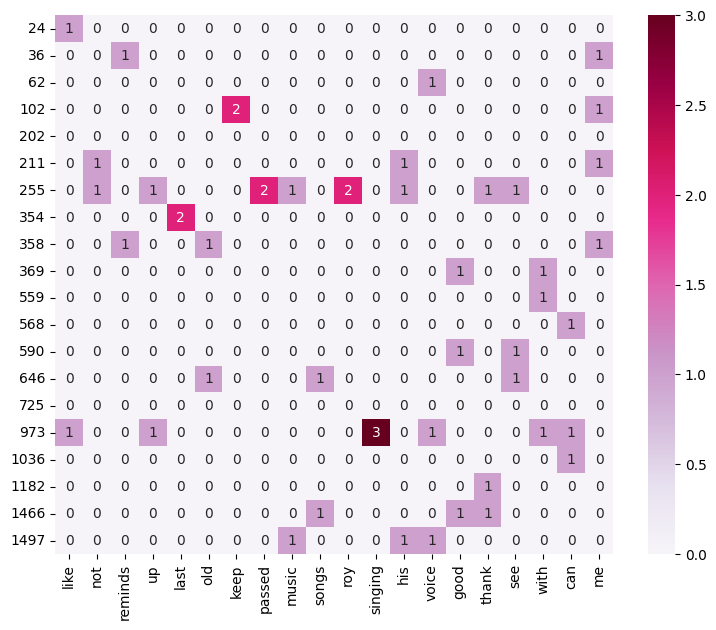

In [94]:
# Visualize the term-document matrix using heatmap
import seaborn as sns

'''
Document Sampling:
  Randomly select 20 unique documents using np.random.choice
  to create a manageable subset for visualization.
'''
doc_sample_num = 20
doc_indices = np.sort(np.random.choice(X_counts.shape[0], doc_sample_num, replace=False))

'''
Term Sampling:
  Calculate the total frequency of each term across the selected documents, focusing on non-zero terms
  Them select the top 30% most frequent terms to prioritize meaningful ones
  Apply systematic sampling with some randomness to ensure an even spread of terms
'''
term_sample_num = 20
term_frequencies_order = np.argsort(X_counts[doc_indices].sum(axis=0).A1)
nonzero_indices = np.where(X_counts[doc_indices].sum(axis=0).A1 != 0)[0]
nonzero_indices_order = term_frequencies_order[np.isin(term_frequencies_order, nonzero_indices)]
nonzero_indices_order_top30 = nonzero_indices_order[int(len(nonzero_indices_order)*0.7):]

sample_step = len(nonzero_indices_order_top30)//term_sample_num
sample_bias = np.random.randint(0,sample_step)
trem_indices = nonzero_indices_order_top30[sample_bias::sample_step][:term_sample_num]

# Visualization:
plot_x = [count_vect.get_feature_names_out()[i] for i in trem_indices]
plot_y = doc_indices
plot_z = X_counts[doc_indices][:,trem_indices].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True)

###5.4 Atrribute Transformation / Aggregation

In [102]:
# Compute these frequencies for each term in all documents
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
len(term_frequencies)

3730

In [105]:
# trun term_frequencies to a dataframe
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [106]:
# visualize the word frequency distribution
import plotly.express as px

fig = px.bar(x = count_vect.get_feature_names_out()[:300],
             y = term_frequencies[:300],
             title = 'Word Frequency Distribution')
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency")
fig.show()

In [107]:
'''
Reduced the visualization data size by selecting terms within the 80%-99% frequency range,
then randomly sampling 150 terms from them. This approach maintains key insights with
minimal computational load and displays significant terms in a concise, informative chart.
'''
top_20_percent_term_index = np.argsort(term_frequencies)[int(len(term_frequencies)*0.80):int(len(term_frequencies)*0.99)]
top_20_percent_sampling_index = np.random.choice(top_20_percent_term_index, 150, replace=False)
plot_y = term_frequencies[top_20_percent_sampling_index]

plot_x = count_vect.get_feature_names_out()[top_20_percent_sampling_index]

fig = px.bar(x = plot_x,
             y = plot_y,
             title = 'Word Frequency Distribution')
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency")
fig.show()

In [108]:
# Order the index by term frequency
top_20_percent_term_index = np.argsort(term_frequencies)[int(len(term_frequencies)*0.80):]
top_20_percent_sampling_index = np.random.choice(top_20_percent_term_index, 150, replace=False)
sampling_order = top_20_percent_term_index[np.isin(top_20_percent_term_index, top_20_percent_sampling_index)]
plot_y = term_frequencies[np.flip(sampling_order)]

plot_x = count_vect.get_feature_names_out()[sampling_order]

fig = px.bar(x = plot_x,
             y = plot_y,
             title = 'Word Frequency Distribution')
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency")
fig.show()

In [110]:
# By using the log-transformed frequency distribution compressed those
# high-frequency terms and allowing lower-frequency terms to stand out more clearly.
import math

top_20_percent_term_index = np.argsort(term_frequencies)[int(len(term_frequencies)*0.5):]
top_20_percent_sampling_index = np.random.choice(top_20_percent_term_index, 150, replace=False)
sampling_order = top_20_percent_term_index[np.isin(top_20_percent_term_index, top_20_percent_sampling_index)]
plot_y = term_frequencies[np.flip(sampling_order)]
# applying log distribution on term_frequencies
plot_y_log = [math.log(i) for i in plot_y]

plot_x = count_vect.get_feature_names_out()[sampling_order]

fig = px.bar(x = plot_x,
             y = plot_y_log,
             title = 'Word Frequency Distribution(log-transformed)')
fig.update_layout(xaxis_title="Words", yaxis_title="Frequency")
fig.show()

###5.5 Dimensionality Reduction

###5.6 Discretization and Binarization

---